## Solving DIT with two alternative approaches

In [1]:
import numpy as np
import matplotlib.pyplot as plt

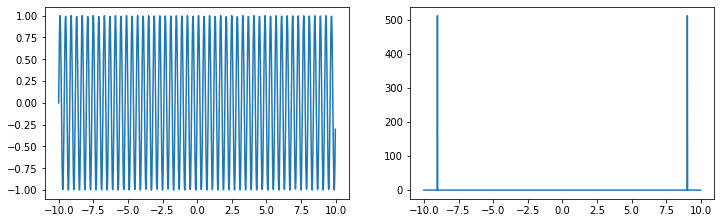

In [2]:
## Simply Finding the DFT of a input fuction
def sin_(t):
    s = np.sin(np.pi*t*5)
    return s
def dtft_(y):
    t = len(y)
    c1 = np.zeros(t,complex)
    n = np.arange(len(y))
    for k in range(t):
        output = y[n]*np.exp(-2j*np.pi*k*n/t)
        c1[k] = np.sum(output)
    return c1
w = np.arange(-10,10,1/51.2)
x = sin_(w)
plt.figure(figsize=(12,12))
plt.subplot(321)
plt.plot(w,x)
X = dtft_(x)
plt.subplot(322)
plt.plot(w,abs(X))

## Solving with a recursive approach

In [6]:
def FFT(x):
    """A recursive implementation of the 1D Cooley-Tukey FFT"""
    N = len(x)
    
    if N % 2 > 0:
        raise ValueError("size of x must be a power of 2")
    elif N <= 32:  # this cutoff should be optimized
        return dtft_(x)
    else:
        n1 = x[::2]
        n2 = x[1::2]
        X_even = FFT(n1)
        X_odd = FFT(n2)
        factor = np.exp(-2j*np.pi*np.arange(N)/N)
        return np.concatenate([X_even + factor[:N//2] * X_odd,
                               X_even + factor[N//2:] * X_odd])

## Solving with an alternative aproach

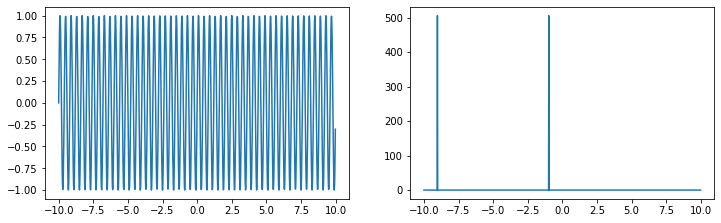

In [4]:
def dft_even_odd(y):
    t = len(y)
    c1 = np.zeros(t,complex)
    n = np.arange(t)
    x = n[::2]
    x1 = n[1::2]
    c2 = np.zeros(t,complex)
    for k in range(int(t/2)):
        output = y[x]*np.exp(-2j*np.pi*k*x/t)       
        c1[k] = np.sum(output)
    for i in range(int(t/2)):
        output1 = np.exp(-2j*np.pi*i/t)*y[x1]*np.exp(-2j*np.pi*i*x1/t)
        c2[i] = np.sum(output1)
    J = c1+c2
    return J
w = np.arange(-10,10,1/51.2)
def sin__(t):
    s = np.sin(np.pi*t*5)
    return s
x = sin__(w)
X = dft_even_odd(x)
plt.figure(figsize=(12,12))
plt.subplot(321)
plt.plot(w,x)
plt.subplot(322)
plt.plot(w,abs(X))

In [7]:
## Testing our result
bn = np.arange(-10,10,1/51.2)
FFT(bn)
np.allclose(FFT(bn),np.fft.fft(bn))

True